## What is convolution and how it works ?

[Convolution][1] is the process of adding each element of the image to its local neighbors, weighted by the [kernel][2]. A kernel, convolution matrix, filter, or mask is a small matrix. It is used for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between a kernel and an image. Lets see how to do this.

[1]: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution
[2]: https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [1]:
import numpy as np
from scipy import signal
import skimage
import skimage.io as sio
from skimage import filters
import matplotlib.pyplot as plt

#### Load the Image and show it.

Image Shape is: (800, 800)


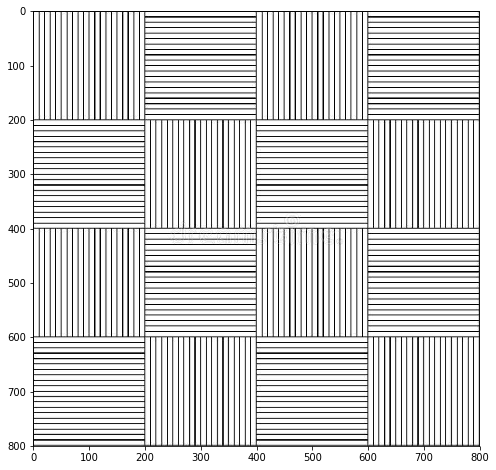

(<matplotlib.image.AxesImage at 0x7fa787205128>, None)

In [2]:
img = sio.imread('images/lines.jpg')
img = skimage.color.rgb2gray(img)
print('Image Shape is:',img.shape)
plt.figure(figsize = (8,8))
plt.imshow(img,cmap='gray',aspect='auto'),plt.show()

#### Generally a convolution filter(kernel) is an odd size squared matrix. Here is an illustration of convolution.
<img src='images/3D_Convolution_Animation.gif'>

![text](images/conv-formula.png)

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="images/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="images/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="images/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="images/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="images/no_padding_strides.gif"></td>
    <td><img width="150px" src="images/padding_strides.gif"></td>
    <td><img width="150px" src="images/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

#### Implementation of Convolution operation

In [61]:
def convolution2d(img, kernel, stride=1, padding=True):
    kernel_size = kernel.shape[0]
    img_row,img_col = img.shape
    if padding:
        pad_value = kernel_size//2
        img = np.pad(img,(pad_value,pad_value),mode='edge')
    else:
        pad_value = 0
    
    filter_half = kernel_size//2
    img_new_row = (img_row-kernel_size+2*pad_value)//stride + 1
    img_new_col = (img_col-kernel_size+2*pad_value)//stride + 1
    img_new = np.zeros((img_new_row,img_new_col))
    
    ii=0
    for i in range(filter_half,img_row-filter_half,stride):
        jj=0
        for j in range(filter_half,img_col-filter_half,stride):
            curr_img = img[i-filter_half:i+filter_half+1,j-filter_half:j+filter_half+1]
            sum_value = np.sum(np.multiply(curr_img,kernel))
            img_new[ii,jj] = sum_value
            jj += 1
        ii += 1

    return img_new

In [62]:
kernel_size = (7,7) #Defining kernel size
kernel = np.ones(kernel_size) #Initializing a random kernel
kernel = kernel/np.sum(kernel) #Averaging the Kernel

(800, 800)


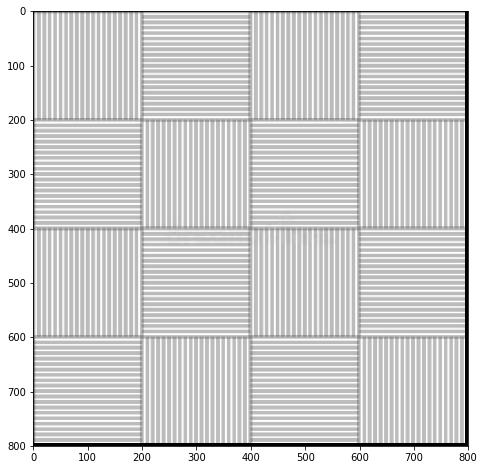

(<matplotlib.image.AxesImage at 0x7fa54ac0f860>, None)

In [63]:
img_conv = convolution2d(img,kernel,padding=True)#Applying the convolution operation
print(img_conv.shape)
plt.figure(figsize = (8,8))
plt.imshow(img_conv,cmap='gray'),plt.show()

By convolving an image using a kernel can give image features. As we can see here that using a random kernel blurs the image. However, there are predefined kernels such as [Sobel](https://www.researchgate.net/profile/Irwin_Sobel/publication/239398674_An_Isotropic_3x3_Image_Gradient_Operator/links/557e06f508aeea18b777c389/An-Isotropic-3x3-Image-Gradient-Operator.pdf?origin=publication_detail) or Prewitt which are used to get the edges of the image. 

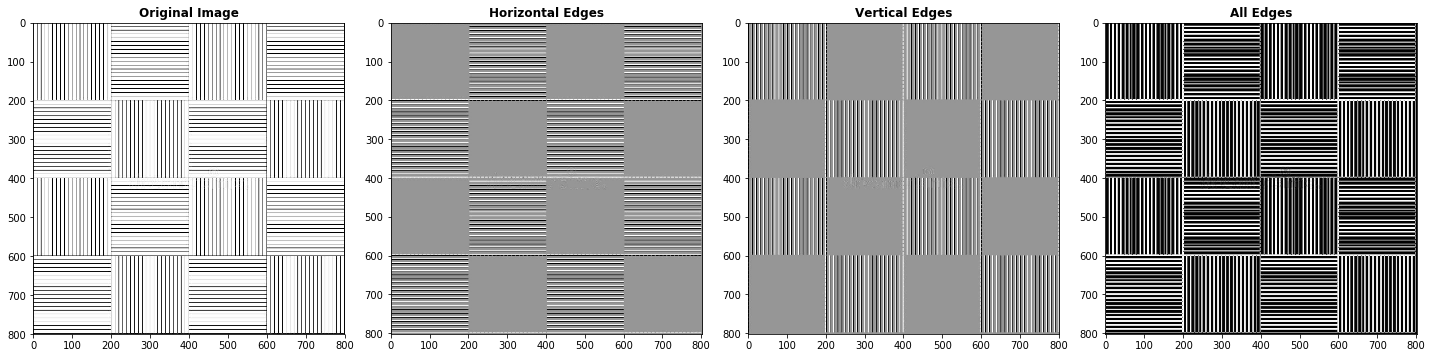

In [45]:
kernel_x = np.array([[ 1, 2, 1],
                     [ 0, 0, 0],
                     [-1,-2,-1]]) / 4.0 #Sobel kernel
kernel_y = np.transpose(kernel_x)

output_x = convolution2d(img, kernel_x)
output_y = convolution2d(img, kernel_y)

output = np.sqrt(output_x**2 + output_y**2)
output /= np.sqrt(2)

fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))
ax1.set_title("Original Image",fontweight='bold')
ax1.imshow(img, cmap=plt.cm.Greys_r)

ax2.set_title("Horizontal Edges",fontweight='bold')
ax2.imshow(output_x, cmap=plt.cm.Greys_r)

ax3.set_title("Vertical Edges",fontweight='bold')
ax3.imshow(output_y, cmap=plt.cm.Greys_r)

ax4.set_title("All Edges",fontweight='bold')
ax4.imshow(output, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()